In [1]:
from msyolo import *
import numpy as np

## This package is essentially a wrapper for yolov8 object detection network. 
First, we will load a 2D numpy array: in this particular case it is a ptychographically reconstructed phase of a monolayer MoS2.

We also need to specify pixel size for subsequent calculation, and specify where the model weights are.



In [2]:
array=np.load("example_image.npy")


pixel_size=0.07 # A

model_path="../weights/atoms.pt"


print("Array shape is (%d,%d), pixel size is %.2f A"%( array.shape[0],array.shape[1], pixel_size ))

Array shape is (590,590), pixel size is 0.07 A


## Now we just call one function to get an array with atomic coordinates. 

You can specify different backends for yolo, I use mps on an M1 mac, but you can also do "cpu" or "cuda".

If you see that not all atoms are detected, try to play with "conf" parameter of yolo. 
Also, if you see that for you particular case the network is not performing good enough, concider retraining it yourself.



0: 640x640 123 atoms, 2163.6ms
Speed: 5.1ms preprocess, 2163.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


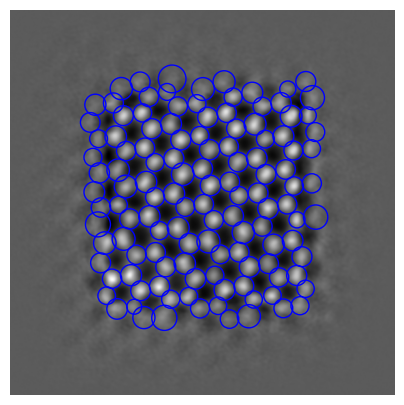

(123, 4)


In [3]:
xywh=get_xywh_from_numpy(array, model_path, yolo_dict={
            'conf':0.1,
          'iou': 0.1,
           'device': 'cpu',
           'max_det': 800,
           'retina_masks': True}, 
                         
            plot=True)

print(xywh.shape)

## Extract a radial profiles of atoms and plot an averaged profile

100%|████████████████████████████████████████| 123/123 [00:00<00:00, 139.04it/s]


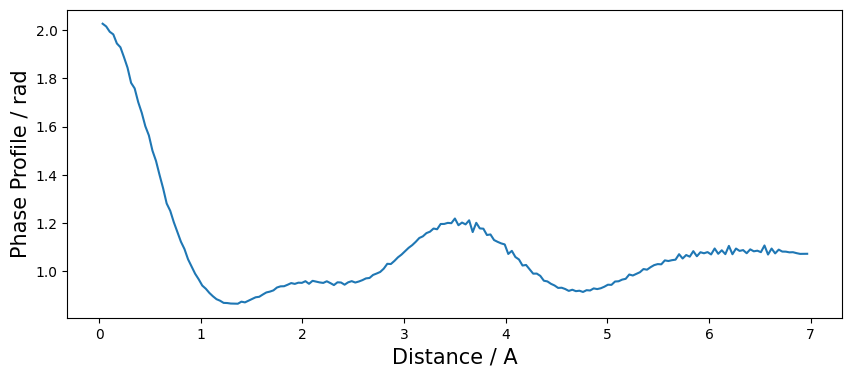

(123, 199) (199,)


In [4]:
profiles, unique_distances= get_radial_profiles_for_atoms(array, xywh, 
                                                          pixel_size, r_bins=0.5, r_max=100)


plt.figure(figsize=(10,4))
plt.plot(unique_distances,np.mean(profiles,0))
plt.xlabel("Distance / A", fontsize=15)
plt.ylabel("Phase Profile / rad", fontsize=15)
plt.show()
print(profiles.shape, unique_distances.shape)

## If you are not satisfied with detection precision, you can refine xywh via COM measurement.

In [5]:
coms = refine_from_xywh(array, xywh, R=None, pos_type="com", thresh=0)
print(coms.shape)

(123, 2)


## Plot new coordinates on initial image on the 

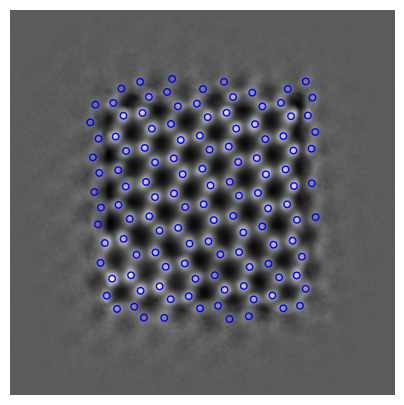

In [6]:
fig=plot_xywh_on_image(array, coms, R=5)

# Get new radial profiles

100%|████████████████████████████████████████| 123/123 [00:00<00:00, 138.91it/s]


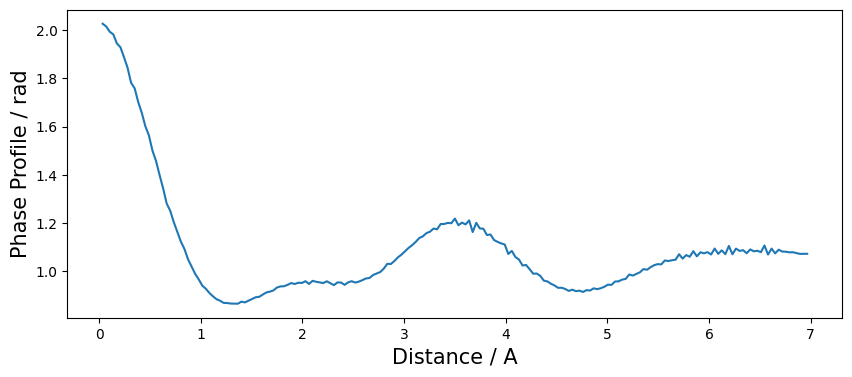

In [7]:
profiles, unique_distances= get_radial_profiles_for_atoms(array, coms, 
                                                          pixel_size, r_bins=0.5, r_max=100)


plt.figure(figsize=(10,4))
plt.plot(unique_distances,np.mean(profiles,0))
plt.xlabel("Distance / A", fontsize=15)
plt.ylabel("Phase Profile / rad", fontsize=15)
plt.show()
